In [3]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [4]:
env = BlackjackEnv()

In [19]:
def print_observation(observation):
    score, dealer_score, usable_ace = observation
    print("Player Score: {} (Usable Ace: {}), Dealer Score: {}".format(
          score, usable_ace, dealer_score))

In [187]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    episodes = []
    for i in range(1,num_episodes):
        observation = env.reset()
        trajectories = []
        for t in range(100):
#             print(observation)
            action = policy(observation)
#             print(action)
#             print("Taking action: {}".format(["Stick", "Hit"][action]))
            next, reward, done, _ = env.step(action)
            trajectories.append((observation,action,reward))
            if done:
#                 print_observation(observation)
#                 print("Game end. Reward: {}\n".format(float(reward)))
                break
            observation = next
        states_in_trajectories = set(x[0] for x in trajectories )
        for state in states_in_trajectories:
            for i,x in enumerate(trajectories):
                if x[0] == state:
                    idx = i
                    state_count = 1.0
                    break
            for i,x in enumerate(trajectories[idx+1:]):
                if x[0] == state:
                    state_count += 1.0                    
                reward += x[2]*(discount_factor**i)
            
            returns_sum[state] += reward
            returns_count[state] += state_count
            V[state] = returns_sum[state] / returns_count[state]
        
    # Implement this!

    return V    

In [188]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

defaultdict(<class 'float'>, {(18, 2, False): -1.1565217391304348, (20, 8, False): 1.255813953488372, (20, 10, False): 0.6333878887070377, (21, 1, True): 0.5789473684210527, (18, 10, False): -1.1023255813953488, (16, 2, False): -0.696078431372549, (12, 3, False): -1.1842105263157894, (18, 5, False): -0.6929824561403509, (13, 5, False): -0.8241758241758241, (12, 5, False): -0.8133333333333334, (18, 9, False): -0.67, (15, 7, False): -0.7583333333333333, (14, 8, False): -0.26804123711340205, (15, 3, False): -0.9456521739130435, (18, 3, False): -1.08, (20, 9, False): 0.9452054794520548, (20, 8, True): 0.5714285714285714, (17, 9, False): -0.7435897435897436, (17, 10, True): -0.6166666666666667, (15, 10, False): -0.762962962962963, (14, 10, True): -1.0, (21, 10, False): 1.7074829931972788, (19, 4, False): -0.9338842975206612, (21, 5, True): 0.975609756097561, (13, 10, False): -1.0693333333333332, (16, 10, False): -0.7178217821782178, (13, 1, False): -1.158878504672897, (20, 1, False): 0.1153

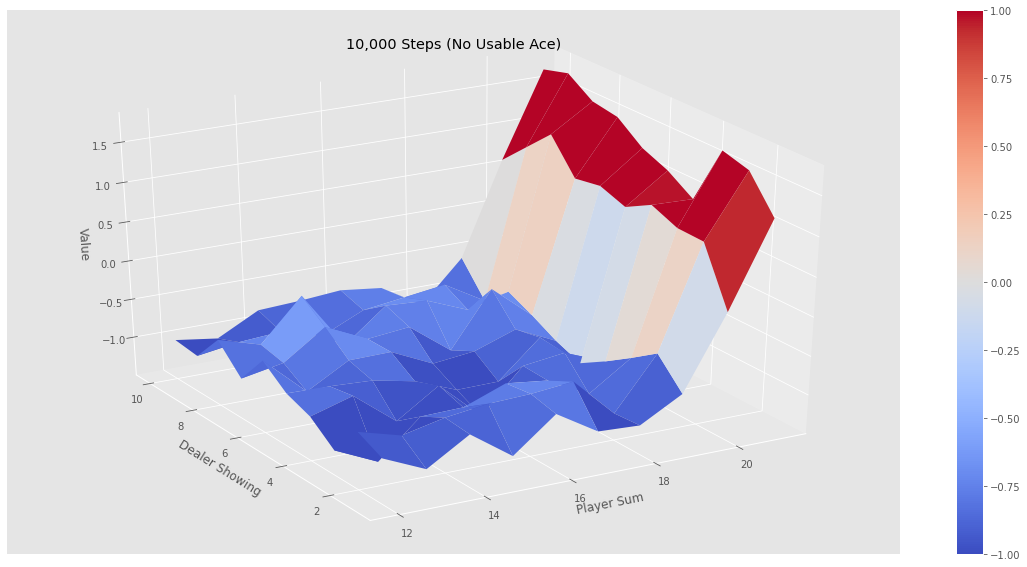

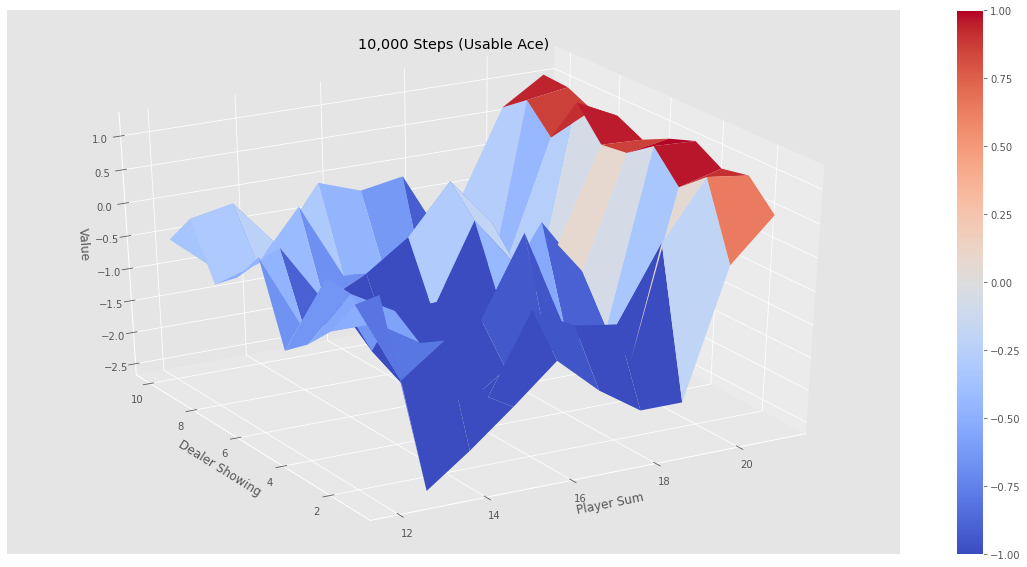

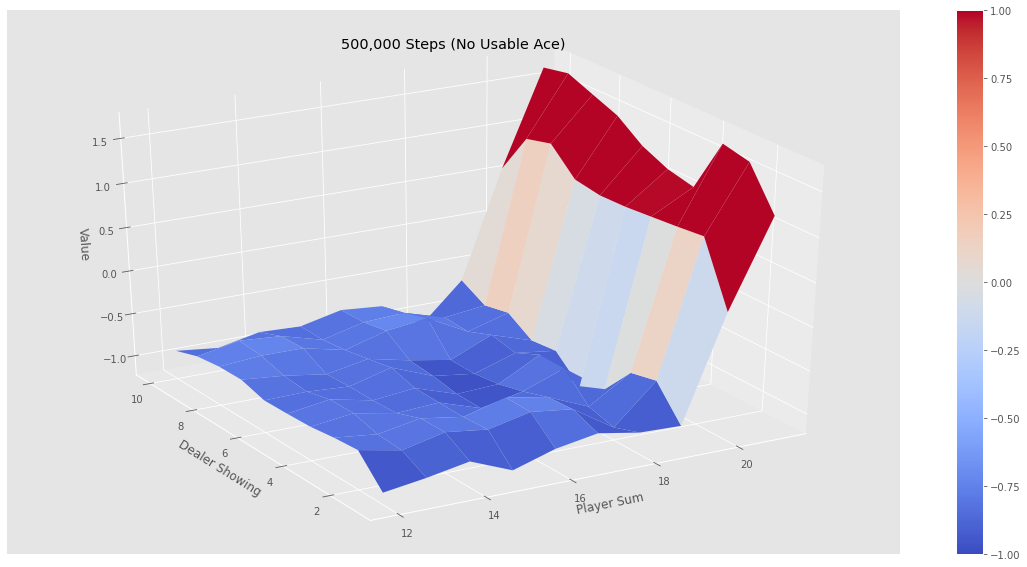

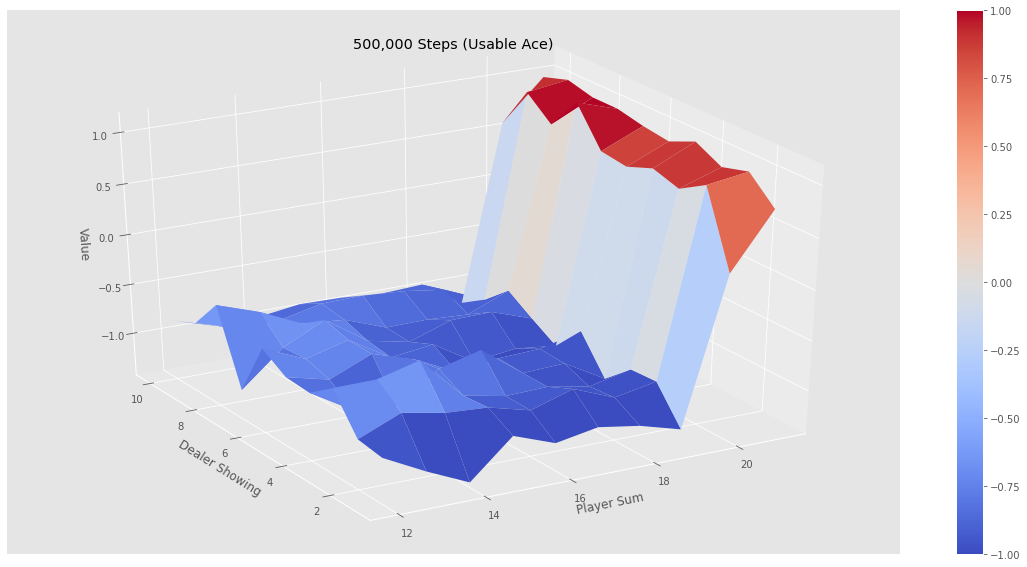

In [189]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)#10000
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")